# Training Schnee an Weihnachten Teil 1



<table><tr>
<td>
<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><span property="dct:title">Training Schnee an Weihnachten Teil 1</span> by <span property="cc:attributionName">Martin Lechner</span> is licensed under <a href="http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY 4.0</a></p>
</td> 
<td> <img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"/ width="20"; height="20"> </td>
<td> <img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"/ width="20"; height="20"> </td>
</tr></table>

Willkommen zum Begleitnotebook der Veranstaltung <i>Coding Workshop – Data Exploration mit der Toolbox Datenkompetenz: „Früher lag mehr Schnee an Weihnachten?!“</i>, welches vom Forschungsteam der Toolbox Datenkompetenz (InfAI e.V., Leipzig) anlässlich des Markts der digitalen Möglichkeiten im Rahmen des Digitalgipfels 2023 am 21.11.2023 in Jena vorgetragen und hier aufbereitet bereitgestellt wird.<br>Das Notebook richtet sich primär zur Vor- und Nachbereitung der Teilnehmenden, als auch an alle Interessierten, die sehen möchten, wie einfache Fragestellungen mit Python bearbeitet werden können. <br>


Auch wenn du in diesem Notebook "nur Zeilen Code ausführst" wirst, wird bereits mit realen Hilfsmitteln gearbeitet. Es wird noch einen ausführlicheren Kurs rund um den Mythos "Schnee an Weihnachten" und entsprechende Datenverarbeitungsansätze und -übungen geben. Wundere dich also nicht, wenn einige Fragen offen bleiben. Ein bisschen ist es auch gewollt.

> Fragestellung: <b>An wie vielen der letzten 100 Jahre hat es an einem bestimmten Ort geschneit?</b>


<u>Wir werden...</u>
1. der oben genannten Fragestellung nachgehen</b>
1. eine Datenquelle für historische Klimadaten ansehen ([Meteostat](https://meteostat.net/de/))
1. mit Hilfe der bereitgestellten Infrastruktur einen Beispielcode für eine Datenabfrage durchführen
1. dank des Beispielcodes zum ersten Mal Daten erhalten
1. den Beispielcode an unsere Bedürfnisse anpassen (Zeitraum und Geodaten) und damit Daten unserer Wahl erhalten 🔖
1. die erhaltenen Daten inspizieren und für unsere Fragestellungen einfache Selektionen vornehmen
1. ein erstes Ergebnis erhalten
1. auf Grundlage des ersten Ergebnisses zu weiteren Fragestellungen anregen

<u>Wie wird in diesem Jupyter Notebook gearbeitet?</u><br>
Das Jupyter Notebook soll Stück für Stück durchgearbeitet werden. Hierzu wird sukzessive der Text gelesen und Code ausgeführt werden, der einigen Textabschnitten folgt. Das Notebook ist so aufgebaut, dass auch ohne Vorwissen rein durch das Ausführen des Codes ein einheitliches Ergebnis gezeigt wird. Der Mehrwert erhöht sich. je mehr Raum den einzelnen Schritten geben wird: sowohl, um nachzuvollziehen, was gerade passiert, als auch, was für (Teil-)Ergebnisse zu sehen sind. <br>
<br>
Das vorliegende Notebook wird zu einem anderen Zeitpunkt in einen ausführlichen Kurs eingebettet. Es kann hier daher nicht allen Aspekten gleichmaßen nachgekommen werden.
<br>
<br>
Nachdem das Notebook einmalig durchgearbeitet wurde, können ab dem Abschnitt "Datenanfrage anpassen🔖" eigene Geodaten angewendet werden. 


Die Code-Zeilen für dieses Notebook sind bereits von uns beschrieben. Diese Zeilen müssen in der Reihenfolge ihres Erscheinens ausgeführt werden. <b>Klicke dazu zunächst in die entsprechende Zeile Code</b>. Anschließend <b>drücke auf der Tastatur "Shift+Enter" gleichzeitig</b>. Alternativ kann mit dem Cursor die untere rechte Ecke der Zeile Code navigiert werden und mit dem Textsymbol <b>run code: Ctrl + Enter</b> die Zeile ausgeführt werden.

👇 Unterhalb ist eine Zeile Code, die lediglichen einen Text ausgeben wird. Führe sie wie beschrieben aus!

In [1]:
print("Meine erste Zeile Code und Output!")

Meine erste Zeile Code und Output!


☝️ <br> Nach dem Ausführen sehen wir:<br> 
- unterhalb der Zeile erscheint der Output: ```Meine erste Zeile Code und Output!```<br>
- links neben der Zeile ein Wandel von ```In [ ]```(nicht ausgeführt) zu ```In [1]```.<br>

<br> 
Die Ziffer in der eckigen Klammer zeigt die Anzahl der bisher aufgeführten Zeilen Code. Prinzipiell kann eine Zeile mehrmals durchgeführt werden, allerdings sollten die Zeilen stets in der Reihenfolge des Erscheinens einmalig ausgeführt werden, um Folgefehler zu vermeiden (und Fehlermeldungen zu Umgehen). Es wird mit dem Zeigende-Hand-Emoji darauf hingewiesen.

<div class="alert alert-block alert-success">
🚩 Prima. Wir stellen jetzt direkt die Datenquelle vor und arbeiten mit Code!
</div>

# Datenquellen erkunden und Daten erhalten

<b> Meteostat (Datenquelle erkunden)</b>

Wir arbeiten in diesem Notebook mit historischen Klimadaten, die von [Meteostat](https://meteostat.net/de/) bezogen werden. Hervorzuheben ist hier die Mühe, die Daten zu sammeln,  eine Infrastruktur einzurichten und diese für alle offen bereitzustellen. Hinsichtlich unserer klimarelevanten Fragestellung können wir also unmittelbar verlässliche historische Daten erhalten und nutzen. So läuft Open Data! 

Als wäre das noch nicht alles, bietet Meteostat auch eine Entwicklungsumgebung für Python. Und Python benutzen wir gerade. Die  [entsprechende Dokumentation von Meteostat](https://dev.meteostat.net/) ist sehr gut erklärt. Es gibt sogar eine eigene `Library "Meteostat"`, die wir nutzen können. Die Dokumetation gibt uns darüber Aufschluss, wie wir mit Meteostat "reden" müssen, um an die gewünschten Ergebnisse zu kommen. Auch Aussagen über Datenqualität etc. sind enthalten.  Für weitergehende Fragen macht es immer Sinn - egal ob es sich um Meteostat oder andere Bibliotheken handelt - die Dokumentation zu konsultieren. Dafür ist sie da. <br>Im Nachfolgenden orientieren wir uns an dem von Meteostat bereitgestellten Beispielcode.

## Beispieldaten mit dem Beispielcode erhalten


Im nachfolgenden installieren wir `Meteostat`, importieren es (gemeinsam mit anderen Libraries) in unser Jupyter Notebook und führen einen Beispielcode aus. Funktioniert alles? 

👇 Klicke in die Zeile Code und führe diese aus. Meteostat wird daraufhin installiert, sofern es nicht bereits installiert ist. Nach dem Ausführen der Zeile Code kann fortgefahren werden

In [2]:
 !pip install meteostat


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Die [Dokumentation](https://dev.meteostat.net/python/#installation) gibt uns einen Code vor, mit dem für einen bestimmten Ort in einer bestimmten Zeitspanne Daten abgefragt werden können. Wir kopieren diesen Code und schauen, was passiert, wenn wir diesen ausführen.
<br>👇 Klicke in diesen großen Codeblock und führe ihn aus.

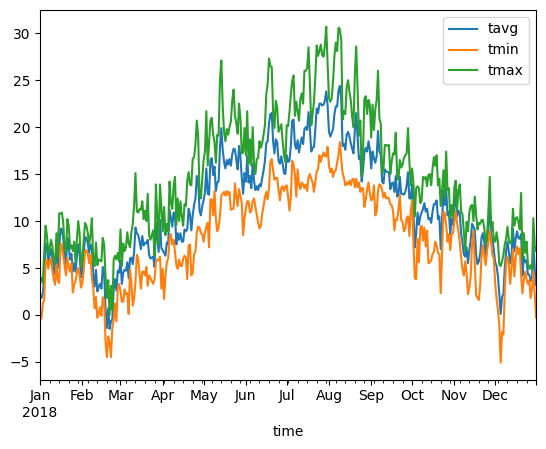

In [3]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

Es wird ein Diagramm bzw. "Plot" dargestellt, wie in der Dokumentation angezeigt. Die Visualisierung beruht auf bereits bestehenden bzw. gerade abgefragten Daten. Wir wollen nun einen Blick in diese Daten werfen. <br>👇  Klicke dazu in die Zeile Code und führe diese aus. 

In [4]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,1.8,-0.4,4.0,0.0,0.0,NaN,8.7,0.0,1030.7,NaN
2018-01-02,1.8,-0.4,3.9,0.0,0.0,NaN,7.1,0.0,1028.5,NaN
2018-01-03,2.3,1.2,3.4,0.0,NaN,NaN,6.8,0.0,1022.5,NaN
2018-01-04,4.1,1.6,6.6,0.0,0.0,NaN,6.1,0.0,1016.7,NaN
2018-01-05,7.6,5.7,9.5,30.4,0.0,NaN,10.0,0.0,1014.5,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,3.6,1.8,5.3,0.0,0.0,74.0,7.2,NaN,1027.8,NaN
2018-12-28,3.8,2.8,4.8,24.5,0.0,66.0,17.6,NaN,1025.2,NaN
2018-12-29,7.5,4.6,10.3,16.6,0.0,180.0,25.3,208.8,1013.7,NaN


Im Beispielcode wurde in die Variable `data` diese Tabelle gespeichert. In einem Jupyter Notebook kann man sich die Variable so wie oberhalb dargestellt einfach anzeigen lassen. Bei dieser Tabelle oberhalb handelt es sich um ein sogenanntes `Dataframe`, das von der `Library "Pandas"` bereitgestellt wird. Wir werden im Folgenden kontinuierlich damit arbeiten, es allerdings an anderer Stelle weiter erörtern.

<div class="alert alert-block alert-success">
🚩Prima! Wir sind dem Beispielcode gefolgt und haben (das erste Mal) Daten erhalten! Tatsächlich haben wir einen sogenannten "API-Call" durchgeführt, den uns Meteostat abgenommen hat. Das ist gut und erspart uns einige hakelige Anfragen. Wir können uns an dem Code richten und unsere Anfrage spezifizieren.
</div>

## Datenanfrage anpassen

> 🔖 Wenn das Notebook einmal durchgearbeitet wurde, kann an diese Stelle zurückgekehrt werden. Du kannst so die Geodaten zu den Geodaten deines Wunschortes ändern! <b> Beachte: du musst dann alle Zeilen der Reihenfolge nach wieder ausführen, damit der Code die neuen Daten verarbeitet.</b> Geodaten können beispielsweise mit Hilfe von Google Maps bezogen werden, indem man rechts auf einen Ort klickt. Das Ziffernpaar sind Geodaten, die du weiter unten in diesem Notebook an der Stelle mit dem Symbol 🔖 abändern kannst. Meteostat sucht dann die nächstgelegene Wetterstation, von der es Daten hat. Komfortabel!

Im Folgenden passen wir nun die Anfrage an und ändern dazu sowohl ein paar Variablennamen als auch Werte. 

📅 Lass uns die Zeit ändern. Wir gehen 100 Jahre zurück. (Hinweis: Dank der `Library datetime` werden Zeitangaben maschinell lesbar und sind damit für die Abfrage verständlich)

👇 Vergess nicht, die kommenden Zeilen Code der Reihenfolge nach auszuführen.

In [ ]:
startdatum = datetime(1919, 1, 1)
enddatum = datetime(2018, 12, 31)

Für den Ort nehmen wir für unser Beispiel das Brandenburger Tor. Hinweis: a) Die Höhe müssen wir nicht angeben, b) Zuvor wurde die Variable  `Vancover ` genutzt. Ab hier nehmen wir eine flexiblere Variable namens `Ort`. Merke: Ausschlaggebend ist in diesem Fall nicht der Name der Variable, sondern sind die Koordinaten, die wir übermitteln!

👇  Klicke in die Zeile Code und führe diese aus.

In [ ]:
# Ändere die Geodaten gerne nach dem ersten Durchlauf
# Berlin Brandenburger Tor: Ort = Point(52.5163, 13.3776)
Ort = Point(52.5163, 13.3776)#🔖in der Klammer kannst du deine Geodaten einfügen

Wir formulieren nun die Anfrage, indem wir die drei Variablen übermitteln, und erhalten hoffentlich die Daten für den genannten Zeitraum und Zielort. Die Anfrage so auszuführen ist recht komfortabel. Die Arbeit an der API und entsprechende Schritte übernimmt das System für uns!

👇  Klicke in die Zeile Code und führe diese aus.

In [ ]:
data = Daily(Ort, startdatum, enddatum)
data = data.fetch()

Der Output kommt im nächsten Abschnitt!

<div class="alert alert-block alert-success">
🚩 Wir haben die Daten für eine Wetterstation in der Nähe unseres Zielortes und Zeitraumes erhalten. 
</div>

#  Datenanalyse

In diesem Abschnitt werden wir nun die erhaltenen Daten analysieren. Dabei ist es ganz normal, die Daten zu erkunden und verschiedene Fragen zu stellen. Dafür sind in der Regel einschlägige Kenntnisse in Python bzw. ein entsprechender  Umgang mit Libraries wie Numpy oder Pandas nötig. Das können wir hier nicht leisten - aber exemplarisch vorstellen!

<b>Datenexploration</b>

Der Umfang von Datenexplorationen variiert je nach Fragestellung, Datensätzen und Vorerfahrung enorm. Sie reicht von einer oberflächlichen bis hin zu einer extrem detaillierten Auseinandersetzung mit den vorliegenden Daten oder Aspekten dieser. Für dieses Beispiel können wir es einfach halten - auch, weil Daten zu Wetter und Klima recht intuitiv sein sollten.

👇 Klicke in die Zeile Code und führe diese aus. 

In [ ]:
data

Wir sehen ein Dataframe, das die Daten der Abfrage beinhaltet. Schaue dir an, wie es aufgebaut ist.

Es werden im Output die ersten und die letzten fünf Einträge des Dataframes dargestellt. Außerdem wird unterhalb "36525 rows × 10 columns" ausgegeben.<br>
Die Reihen (rows) stehen hier für Tage, die im `datetime` Format hinterlegt sind (YYYY-MM-TT). Jedem Tag sind Werte zugeordnet, in diesem Fall 10 innerhalb der Spalten (columns). Siehst du `NaN` in der Tabelle, bedeutet es, dass es hierzu keinen Eintrag gibt. Was `NaN` genau bedeutet und wofür die Spalten mit ihren entsprechenden Werten stehen, wird in der Dokumentation notiert und lässt sich dort nachlesen.

Die Benennung der Daten im Datensatz ist zum Glück intuitiv: Snow meint Schnee, und time meint Zeit (in diesem Fall das Datum).

Alle Tage befinden sich im Index im `datetime Format` hinterlegt. Eigentlich haben wir drei Angaben: Jahr, Monat, Tag. Dank Kompatibilität mit `datetime`-, können wir diese drei Angaben unabhängig voneinander ansprechen.

<b> Datenselektion </b>

👇  Klicke in die Zeile Code und führe diese aus.

In [ ]:
# Datensatz wird auf den Monat Dezember eingegrenzt
data=data[data.index.month==12]

👇  Klicke in die Zeile Code und führe diese aus.

In [ ]:
# Datensatz wird auf den 24. reduziert 
data=data[data.index.day==24]

Im Anschluss wird die Zeit nur anhand des Jahres dargestellt. 

👇  Klicke in die Zeile Code und führe diese aus.

In [ ]:
data.index=data.index.year
data

Wichtig: Sollen Änderungen langfristig geschehen, muss einer Variable (hier  `data`) sich wieder zugeordnet werden (hier  `data = data ...`), damit die Änderungen beibehalten werden. Ohne dies wird zwar ein neues Ergebnis bzw. eine neue Ansicht angezeigt, allerdings fortlaufend nicht gespeichert.

Mit bloßem Auge lässt sich in der Tabelle erkennen, dass in einigen Jahren offensichtlich kein Schnee gefallen ist. Ein Überblick wäre jetzt gut.

<b>Daten visualisieren<b>

Daten werden häufig visualisiert, um mit und an den Daten weiter zu arbeiten. Wir können einen "Plot" generieren und schauen uns in einen Balkendiagramm an, wie oft es geschneit hat in den letzten 100 Jahren.

👇  Klicke in die Zeile Code und führe diese aus. 

In [ ]:
data["snow"].plot(kind="bar",figsize=(16,12))

Auch wenn es nicht die schönste Darstellung ist: Wir sehen, dass es an Weihnachten nicht so oft geschneit hat. Auch die Schneemenge scheint stark zu variieren. Was siehst du? 

Jetzt wollen wir eine konkrete Aussage generieren: an welchen Jahren hat es überhaupt geschneit? In wie vielen der letzten 100 Jahre hat es damit insgesamt geschneit?

Hierzu schließen wir erst einmal die Jahre aus, in denen es nicht geschneit hat. <br> 👇  Klicke hierzu in die Zeile Code und führe diese aus.

In [ ]:
data=data[data["snow"]!=0]
data

# Ergebnis und Ergebnisinterpretation

Mit `.shape` können wir uns ausgeben lassen, wie viele Zeilen (links) und Spalten (rechts) die vorherige Abfrage erzeugt hat.

👇  Klicke in die Zeile Code und führe diese aus.

In [ ]:
# .shape zeigt uns die Gesamtzahl der Zeilen an und die Gesamtzahl der Spalten)
data.shape

<div class="alert alert-block alert-success">
    🚩 Prima, unser erstes Ergebnis:<br> Innerhalb der letzten 100 Jahre gab es an <b>22 Jahren </b> Schneefall an Weihnachten am Ort Berlin, Brandenburger Tor mit den Daten aus der gegebenen Quelle.
</div>

<div class="alert alert-block alert-info">
<b>Ergebnisinterpretation:</b> Was bedeutet das Ergebnis <b>22 Jahre</b> prinzipiell für unsere Hauptfragestellung: Gab es nun mehr Schnee oder nicht? Wie würdest du nun auf diese Frage antworten?
</div>

<div class="alert alert-block alert-info">
 <b>Fragestellung anpassen:</b> 
Bist du überhaupt zufrieden mit dem Ergebnis? Wurde etwas nicht beachtet? Überlege, welche weiteren Fragestellungen möglich sind! Scrolle dazu hoch und sieh dir sowohl die Visualiserung als auch die Tabellen (aka Dataframe) an. Unterhalb findest du weitere Anregungen!
</div>



<div class="alert alert-block alert-warning">
<b>Prozessreflektion:</b> Wir sind in dem Notebook Stück für Stück vorgegangen und haben mit Hilfe von Python, Python Libaries und Meteostat sowohl Daten erhalten als auch damit gearbeitet. Was wäre, wenn wir keine Library Meteostat oder keine Library datetime gehabt hätten? Was wären Alternativen gewesen? Denkst du, die Alternativen sind einfacher? Was wäre ohne dieses Jupyter Notebook als Medium gewesen?
</div>

<div class="alert alert-block alert-danger">
<b>Hinterfragen der erhaltenen Daten:</b><br> Es gibt festgelegte Wetterstationen <a href="https://dev.meteostat.net/python/api/stations/#parameters">Stations</a> von denen wir Daten direkt beziehen können, indem wir statt der Koordinaten eine entsprechende id übermitteln. Allerdings sind Wetterstationen nicht gleich alt und messen nicht immer von an Anfang für alle Zeiträume bestimmte Wetterphänomene. Die Datengrundlage könnte also hier und da ein wenig "löchrig" sein und es gibt bestimmte Wege damit umzugehen.<br>
Indem wir Koordinaten mit `Point()` übermittelt haben, werden laut Dokumentation <a href="https://dev.meteostat.net/python/point.html#api">Point</a> für diesen geografischen Punkt spezielle (auch wählbare) Interpolationsmethoden eingesetzt, um Daten von umliegenden Wetterstationen zu diesem (ziemlich vollständig erscheinenden) Datensatz zu bündeln. In einem Zeitraum von 100 Jahren sind vermutlich ältere Einträge stärker von Interpolarisierung betroffen als neuere.<br> Für unser Beispiel "Brandenburger Tor" müssten wir uns noch einmal genauer mit der Dokumentation und den angewandten Interpolationsmethoden beschäftigen. Das ist kein Spezialproblem, sondern Bestandteil der Routine beim Arbeiten mit Daten, um die Datengrundlage und letztlich die Aussagefähigkeit von Ergebnissen abzusichern. Dazu zu einem späteren Zeitpunkt mehr. <br><br>Für den verbleibenden Teil dieses Trainings (und darüber hinaus) gehen wir davon aus, dass die erhaltene Datengrundlage sehr zutreffend ist und bestmöglichst berechnet wurde)! <br>
<br> Wie schätzt du diesen Umstand in Bezug auf das Ergebnis <b>22 Jahre</b> ein? 
</div>

<b>Anregungen, zu weiteren Fragestellungen</b><br>
Die folgenden Felder können mit einem Linksklick aufgeklappt werden. Nimm dir zunächst etwas Zeit und gehe den obigen Anregungen nach. Hättest du vielleicht etwas anders gemacht oder würdest das Ergebnis gerne verfeinern?  Unterhalb bieten wir ein paar Anregungen. <br>Diejenigen, die bereits Kenntnisse in Python haben, können gerne ein gesondertes Jupyter Notebook im Workspace der Plattform öffnen, um eigenen Fragen nachzugehen und Analysen selbstständig durchzuführen.

<details>
    <summary>Anregung  1 (Linksklick zum Aufklappen)🔖 </summary>
    Berlin ist ein Ort in Deutschland. Wie sieht es an einem anderen Ort aus? Ändere dazu oben 🔖die Geodaten und führe alle Zeilen Code ab einschließlich der geänderten Zeile Code erneut aus! Sei dir bewusst, dass der Text sich nicht an dein Beispiel anpasst, sondern lediglich der Output der Zeilen Code. Es kann vorkommen, dass für einige andere Orte bestimmte Fälle auftauchen. Darunter könnte sein, dass `NaN` auftaucht, was bedeutet, dass hier keine Daten eingetragen worden sind: Wir wissen es also nicht!
</details>

<details>
    <summary>Anregung  2 (Linksklick zum Aufklappen)</summary>
    Schau dir diese kleine Tabelle an. Was bedeutet sie? Was sagt sie in Bezug zu einer "weißer Weihnacht" und zu deiner Einschätzung einer "wirklich" weißen Weihnacht? Bist du mit dem bisherigen Ergebnis "22" noch einverstanden?
<code>
10.0     6
30.0     3
40.0     1
60.0     2
70.0     3
80.0     1
100.0    1
130.0    1
140.0    1
170.0    1
200.0    1
220.0    1</code>
</details>

<details>
    <summary>Anregung  3 (Linksklick zum Aufklappen)</summary>
    Schau dir diese kleine Tabelle an. Was bedeutet sie? Was sagt sie in Bezug zu "weißer Weihnacht" und zu deiner Einschätzung einer "wirklich" weißen Weihnacht? Bist du mit dem bisherigen Ergebnis "22" noch einverstanden?
<code>
 6.8    1
 3.0    1
 2.0    1
 1.1    1
 0.8    2
 0.7    1
-0.2    1
-1.4    1
-1.5    1
-1.6    1
-2.2    1
-3.2    1
-3.7    1
-3.8    1
-6.2    1
-6.6    1
-6.9    1
-7.1    1
-7.6    1
-8.0    1
-8.4    1</code>
</details>

<details>
    <summary>Anregung  4 (Linksklick zum Aufklappen)</summary>
Wir haben uns bisher auf den 24.12. geinigt. Auch wenn es an dem Tag nicht geschneit hat, lag vielleicht noch Schnee?
</details>

<details>
    <summary>Anregung  5 (Linksklick zum Aufklappen)</summary>
Was sagen Suchmaschinen, Sprachassistent:innen und Large Language Model basierte Assistent:innen dazu? Zu welchem Ergebnis kommen sie? Kannst du abschätzen (oder sie fragen) wie sie vorgegangen sind, um zu dem jeweiligem Ergebnis zu kommen? </details>

Abschließend: Was sagt eigentlich die entsprechende Stelle [Deutscher Wetterdienst](https://www.dwd.de/) dazu?

In [ ]:
## Wenn du die entsprechenden Fähigkeiten mitbringst, kannst du hier gerne selbstständig weiter arbeiten.